# **Author details**


*   Author : vinay vihari lakamsani
*   Net Id: vvl18001
*   Student Id: 2763423
*   Email Id: vinay.lakamsani@uconn.edu
*   Assignment 01

*  Date :04-Feb-2019 




# **About Data**
 We are using two awesome datasets for this assignment - US county-level census estimates from 2015 (American Community Survey) and summarized/aggregated data for the VIIRS satellite which takes a picture of the Earth every night at ~1:30 AM local time. For each county, I fit a function to calculate the percentiles of nighttime light (NTL) brightness per county. 
 
Background on county-level estimate data - your target variable is POPESTIMATE2015 (county-level population estimate from 2015) https://www.census.gov/programs-surveys/acs/ 
 
Background on VIIRS NTL data from July 2015 - you should use all columns starting with “Q” like Q0, Q25, Q50 etc. https://ncc.nesdis.noaa.gov/VIIRS/  

# **Importing libraries**

In [0]:
#importing pandas as part of handling the dataframe
import pandas as pd

#used to read excel filess
from pandas import read_excel

# importing numpy : used for array,matrix and other data types
import numpy as np

# importing scikit
# importing sklearn used for datasets and linear model building
# this library contains all machine learning models
from sklearn import datasets, linear_model

# importing the metrics
from sklearn.metrics import mean_squared_error, r2_score

# importing matplotlib for ploting the graph
import matplotlib.pyplot as plt

# importing random
import random

#setting random to 123 so that randomness won't change through out model
# even if we run once again
random.seed(123)

#importing metrics to calculate AUC
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# **Loading data**
loading the dataset from google drive
```




In [0]:
#uploading files to google co lab
#from google.colab import files
#uploaded = files.upload()
#df = pd.read_excel("DL HW 1_data.xlsx")

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')
#ls

sharable link for the data:
https://drive.google.com/open?id=1Q2s0-FLLgxLavQNaJPwz-mUFycvuo95n


id = 1Q2s0-FLLgxLavQNaJPwz-mUFycvuo95n




In [0]:
url = "https://drive.google.com/uc?export=download&id=1Q2s0-FLLgxLavQNaJPwz-mUFycvuo95n"

df = read_excel(url)
df.head()

,Month,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015
0,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Maryland,Allegany,72498
1,JUL,0.02,0.08,0.09,0.11,0.13,0.18,0.30,0.72,1.89,4.110,10.37625,18.9790,95.500000,Alabama,Russell,58847
2,JUL,0.10,0.15,0.16,0.18,0.20,0.23,0.30,0.46,0.82,1.363,3.11650,7.0808,42.669998,Georgia,Meriwether,21186
3,JUL,-0.04,0.03,0.04,0.05,0.07,0.12,0.21,0.47,0.92,1.500,2.93425,8.3137,203.500000,Louisiana,Cameron Parish,6815
4,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Iowa,Clarke,9227


# **Data Exploring**

In [0]:
df.describe()

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,POPESTIMATE2015
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,-0.002188,0.038799,0.053699,0.070809,0.097120,0.174372,0.351830,0.783197,1.777998,2.982530,4.716755,8.087240,39.663584,1.058292e+05
std,0.141941,0.171293,0.230851,0.304831,0.425011,0.825364,1.685318,3.355028,6.304048,8.998663,12.084223,17.355886,98.100495,3.532298e+05
min,-0.580000,-0.280000,-0.180000,-0.120000,-0.070000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000e+01
25%,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088100e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165000,0.585000,2.575600e+04
75%,0.000000,0.030000,0.050000,0.070000,0.090000,0.140000,0.230000,0.420000,0.860000,1.583250,3.291500,8.595625,50.370000,7.043000e+04
max,2.610000,2.773600,6.000000,7.636000,10.530000,17.709999,32.000000,50.889999,74.743997,97.989998,122.191002,191.830002,2209.040039,1.012325e+07


# **Data Preprocessing**

*  remove negative values
*  check about zero values
*  check about other columns

In [0]:
# replacing the negative values with zero

num = df._get_numeric_data()
num[num<0] = 0
df.describe()

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,POPESTIMATE2015
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,0.021708,0.043215,0.056080,0.071960,0.097440,0.174384,0.351830,0.783197,1.777998,2.982530,4.716755,8.087240,39.663584,1.058292e+05
std,0.123059,0.169017,0.229919,0.304463,0.424925,0.825361,1.685318,3.355028,6.304048,8.998663,12.084223,17.355886,98.100495,3.532298e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088100e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165000,0.585000,2.575600e+04
75%,0.000000,0.030000,0.050000,0.070000,0.090000,0.140000,0.230000,0.420000,0.860000,1.583250,3.291500,8.595625,50.370000,7.043000e+04
max,2.610000,2.773600,6.000000,7.636000,10.530000,17.709999,32.000000,50.889999,74.743997,97.989998,122.191002,191.830002,2209.040039,1.012325e+07


## **Understanding the data** 
why some rows have all zero values 
find there significance

In [0]:
df[(df['Q10']==0) & (df['Q5']==0)].shape
u_df=df.copy()
u_df['POPESTIMATE2015']=0
u_df['e'] = u_df.sum(axis=1)
u_df.head()

,Month,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015,e
0,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Maryland,Allegany,0,0.000000
1,JUL,0.02,0.08,0.09,0.11,0.13,0.18,0.30,0.72,1.89,4.110,10.37625,18.9790,95.500000,Alabama,Russell,0,132.485250
2,JUL,0.10,0.15,0.16,0.18,0.20,0.23,0.30,0.46,0.82,1.363,3.11650,7.0808,42.669998,Georgia,Meriwether,0,56.830298
3,JUL,0.00,0.03,0.04,0.05,0.07,0.12,0.21,0.47,0.92,1.500,2.93425,8.3137,203.500000,Louisiana,Cameron Parish,0,218.157950
4,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Iowa,Clarke,0,0.000000


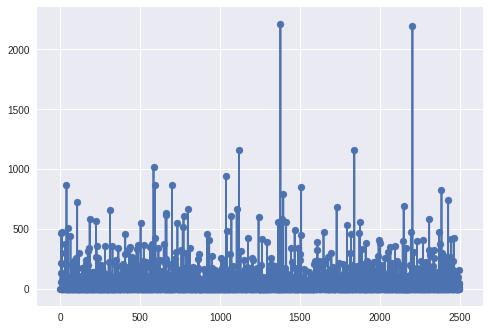

In [0]:
x=u_df[u_df['e']==0].shape[0]

plt.plot(u_df['e'])
plt.scatter(range(u_df.shape[0]),u_df['e'])


Main data frame contains 2500 observations out of which 1242 rows contains all of them as zero
which means that half of the observations contains zeros

In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')
from google.colab import files
fil=u_df.to_csv(index=False)
#files.download(fil)

## ** Tableau Insights**

*  Image files for states where Q0 to Q100 is zero 
*  plotted in Tableau: check image on below link
*  https://drive.google.com/file/d/1iHZJ11hYHn-79Jry2JPvZ3murPGpxiZ3/view?usp=sharing
*  general view of whole data
*  https://drive.google.com/file/d/1YkMrniL5Qwkd717QRP0sDHiMVGhpOKWE/view?usp=sharing





# **Create Training And Test Data**

In [0]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.

df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# view top 5 rows
df.head()

,Month,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015,is_train
0,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Maryland,Allegany,72498,True
1,JUL,0.02,0.08,0.09,0.11,0.13,0.18,0.30,0.72,1.89,4.110,10.37625,18.9790,95.500000,Alabama,Russell,58847,True
2,JUL,0.10,0.15,0.16,0.18,0.20,0.23,0.30,0.46,0.82,1.363,3.11650,7.0808,42.669998,Georgia,Meriwether,21186,True
3,JUL,0.00,0.03,0.04,0.05,0.07,0.12,0.21,0.47,0.92,1.500,2.93425,8.3137,203.500000,Louisiana,Cameron Parish,6815,True
4,JUL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00000,0.0000,0.000000,Iowa,Clarke,9227,True


In [0]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [0]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 1873
Number of observations in the test data: 627


In [0]:
#assigning the x and y columns for modeling

x_train = train.iloc[:,1:16]

y_train = train['POPESTIMATE2015']

x_test = test.iloc[:,1:16]

y_test = test['POPESTIMATE2015']

# **Creating Results df** 

dataframe for storing results of all models

In [0]:
d={'Model':['Linear','Random','GBM'],'Test_MAPE':[652.42,572.21,609.77],'Test_MAE':[108995.995,106748.61,102956.35],'Train_MAPE':[652.42,572.21,609.77],'Train_MAE':[108995.995,106748.61,102956.35]}
results_model=pd.DataFrame(data=d)
results_model

,Model,Test_MAE,Test_MAPE,Train_MAE,Train_MAPE
0,Linear,108995.995,652.42,108995.995,652.42
1,Random,106748.610,572.21,106748.610,572.21
2,GBM,102956.350,609.77,102956.350,609.77


# **linear regression model**

In [0]:
#create linear regression object
regr = linear_model.LinearRegression()


In [0]:
# train the model using the training sets
regr.fit(x_train.iloc[:,0:13],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# making predictions on test dataset

y_pred = regr.predict(x_test.iloc[:,0:13])


In [0]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-4.75738872e+05 -9.38287319e+04  1.86199237e+05 -1.70220299e+05
 -1.03033161e+05  1.39904151e+04 -8.91318116e+04  5.06503107e+04
  3.90977574e+04 -2.70472341e+03  2.61797918e+03 -3.84133977e+03
  1.76651491e+02]
Mean squared error: 53826523066.39
Variance score: 0.01


## **results graph**

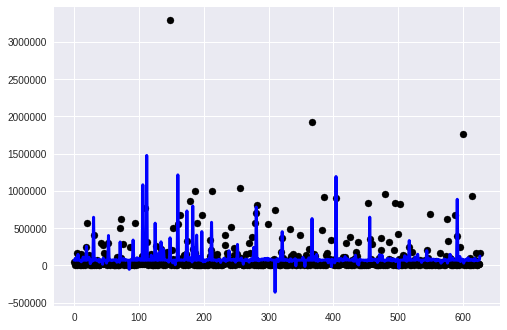

In [0]:
# Plot outputs
myList=[i for i in range(y_test.size)]
plt.scatter(myList,y_test,color='black')
plt.plot(myList,y_pred,color = 'blue',linewidth=3)

*  linear model has lot of negative predictions 
*  blue plot represents the predicted values
*  black represents true values of population

## **Calculating Parameters linear regression model**

Test data Mean Absolute Percent error: 689.6827956032803
Test data Mean Absolute error: 102801.75446511146
Train data Mean Absolute Percent error: 647.2889104619417
Train data Mean Absolute error: 106894.10586153527


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f6939ed5f28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6939edc7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6939ee62b0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6939edcef0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6939edc0f0>,
  <matplotlib.lines.Line2D at 0x7f6939e7a630>]}

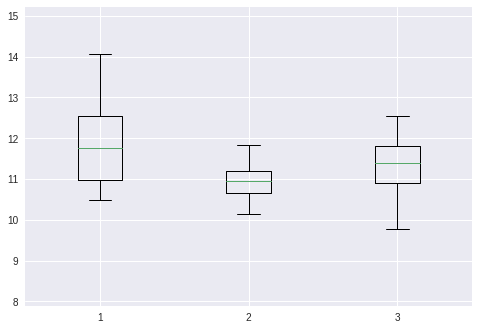

In [0]:
#error for validation set
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Test data Mean Absolute Percent error: "+ str(MAPE))

MAE = np.mean(np.abs(y_test - y_pred))
print("Test data Mean Absolute error: "+ str(MAE))

results_model.loc[0,'Test_MAPE']=MAPE
results_model.loc[0,'Test_MAE']=MAE

t_pred=regr.predict(x_train.iloc[:,0:13])
#error for training set 
MAPE = np.mean(np.abs((y_train - t_pred) / y_train)) * 100
print("Train data Mean Absolute Percent error: "+ str(MAPE))
results_model.loc[0,'Train_MAPE']=MAPE
MAE = np.mean(np.abs(y_train - t_pred))
print("Train data Mean Absolute error: "+ str(MAE))
results_model.loc[0,'Train_MAE']=MAE


AE = np.abs(y_test - y_pred)

nf_df = x_test
nf_df['AE']=AE
CA=nf_df[nf_df['STNAME']=='California']['AE']
TX=nf_df[nf_df['STNAME']=='Texas']['AE']
FL=nf_df[nf_df['STNAME']=='Florida']['AE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)


**Inferences from box plots**

1.   for california we had very big variance in absolute error
2.   Texas has got very less variation in the absolute error.
3.   Florida has same error mean as Texas but this has more variance AE.
4.   Overall California has high amount of error with more variation



## **Box plot**

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f6939e51978>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6939e5b240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6939e5bcc0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6939e5b940>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6939e51b00>,
  <matplotlib.lines.Line2D at 0x7f6939df7080>]}

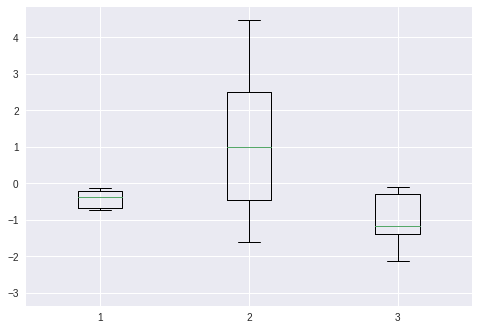

In [0]:
APE = np.abs((y_test - y_pred)/y_test)
#plt.boxplot(APE)
APE_log = np.log(APE)
#plt.boxplot(APE_log)

nf_df = x_test
nf_df['APE']=APE
CA=nf_df[nf_df['STNAME']=='California']['APE']
TX=nf_df[nf_df['STNAME']=='Texas']['APE']
FL=nf_df[nf_df['STNAME']=='Florida']['APE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

**Insights from box plots**



1.   APE of california has got very less variation and it is near to zero
2.   APE of Texas has very high variation and it has positive value.
3.   Florida has negative MAPE and it has high variation.




## **50 worst predictions for linear regression model**

In [0]:
# 50 worst predicted countries in the US from linear regression
AE_d= np.abs(y_pred-y_test)
x_test_error = test.iloc[:,2:17]
x_test_error['pop_pred']=y_pred
x_test_error['AE']=AE_d

#soritng based upon the absolute error
x_sort=x_test_error.sort_values(['AE'], ascending=[False])

# getting top 50 rows 
pred_50=x_sort.head(50)
pred_50

,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015,pop_pred,AE
614,0.0100,0.03000,0.04,0.06,0.08,0.16,0.9800,9.830000,20.010000,31.154000,47.090000,227.960007,California,San Diego,3290044,3.697651e+05,2.920279e+06
2413,0.0000,0.00000,0.00,0.00,0.00,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,Michigan,Wayne,1762098,7.046197e+04,1.691636e+06
1489,0.0000,0.00000,0.00,0.02,0.16,0.32,1.5200,17.660000,33.795000,48.070000,64.209999,176.470001,California,Santa Clara,1919220,6.285339e+05,1.290686e+06
487,0.0000,0.00000,0.00,0.00,0.76,1.39,12.6200,28.451999,43.009998,55.720001,74.830002,145.490005,Kentucky,Fayette,315055,1.476615e+06,1.161560e+06
659,1.0685,1.16000,1.20,2.67,9.49,20.16,36.0900,56.754999,76.459999,110.870002,133.704006,179.309998,Virginia,Portsmouth city,96241,1.215455e+06,1.119214e+06
1262,2.6400,3.29000,4.06,5.30,7.10,10.77,20.1850,35.650002,48.260000,59.875000,77.918002,140.300003,Georgia,Cobb,742023,-3.603752e+05,1.102398e+06
456,0.0000,0.84675,1.13,1.68,3.56,7.77,17.9100,28.719999,35.629001,41.101500,49.415300,62.209999,Virginia,Lynchburg city,79146,1.082373e+06,1.003227e+06
1036,0.0000,0.00000,0.00,0.00,0.00,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,Maryland,Montgomery,1039370,7.046197e+04,9.689080e+05
770,0.0000,0.00000,0.00,0.00,0.00,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,Missouri,St. Louis,1001127,7.046197e+04,9.306650e+05
1937,0.0000,0.00000,0.00,0.00,0.00,0.00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,Wisconsin,Milwaukee,958859,7.046197e+04,8.883970e+05


# **Random forest model** 

In [0]:
#importing randomforest regression 
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(x_train.iloc[:,0:13], y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred_forest=regressor.predict(x_test.iloc[:,0:13])

In [0]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_forest))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_forest))

Mean squared error: 47869447286.33
Variance score: 0.12


## **results graph**

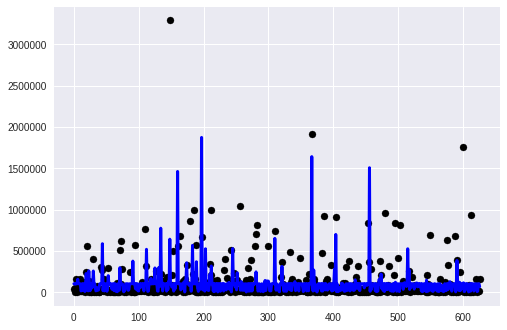

In [0]:
# Plot outputs
myList=[i for i in range(y_test.size)]
plt.scatter(myList,y_test,color='black')
plt.plot(myList,y_pred_forest,color = 'blue',linewidth=3)

*  we don't have any negative values in prediction.
*  this model has more performed well than the linear model.

## **Calculating Parameters for random model**

Test data Mean Absolute Percent error: 545.8906245665817
Test data Mean Absolute error: 95754.87454075505
Train data Mean Absolute Percent error: 636.2960622500605
Train data Mean Absolute error: 77800.20471243089


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f6939d41588>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6939d41e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6939d488d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6939d48550>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6939d41710>,
  <matplotlib.lines.Line2D at 0x7f6939d5cc50>]}

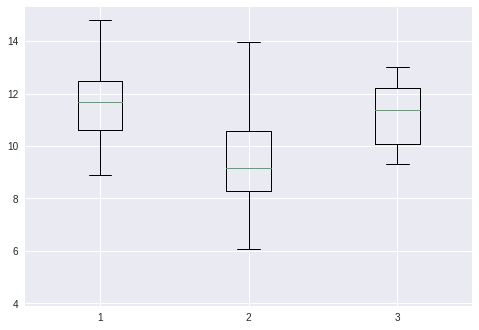

In [0]:
MAPE = np.mean(np.abs((y_test - y_pred_forest) / y_test)) * 100
print("Test data Mean Absolute Percent error: "+ str(MAPE))

MAE = np.mean(np.abs(y_test - y_pred_forest))
print("Test data Mean Absolute error: "+ str(MAE))

results_model.loc[1,'Test_MAPE']=MAPE
results_model.loc[1,'Test_MAE']=MAE


t_pred=regressor.predict(x_train.iloc[:,0:13])
#error for training set 
MAPE = np.mean(np.abs((y_train - t_pred) / y_train)) * 100
print("Train data Mean Absolute Percent error: "+ str(MAPE))
results_model.loc[1,'Train_MAPE']=MAPE
MAE = np.mean(np.abs(y_train - t_pred))
print("Train data Mean Absolute error: "+ str(MAE))
results_model.loc[1,'Train_MAE']=MAE

AE = np.abs(y_test - y_pred_forest)
AE_log = np.log(AE)
#plt.boxplot(AE_log)

nf_df = x_test
nf_df['AE']=AE
CA=nf_df[nf_df['STNAME']=='California']['AE']
TX=nf_df[nf_df['STNAME']=='Texas']['AE']
FL=nf_df[nf_df['STNAME']=='Florida']['AE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

 **Inferences from box plot**
 
 *  california has high MAE compared to other two states.
 *  Again Texas and Florida has almost same MAE.
 *  Texas has got lot of variation compared to all states.

## **Box plot**

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f6939cb24a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6939cb2d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6939cbc7f0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6939cbc470>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6939cb2630>,
  <matplotlib.lines.Line2D at 0x7f6939ccdb70>]}

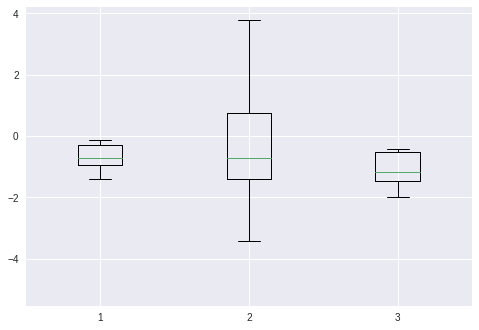

In [0]:
APE = np.abs((y_test - y_pred_forest)/y_test)
#plt.boxplot(APE)
APE_log = np.log(APE)
#plt.boxplot(APE_log)
nf_df = x_test
nf_df['APE']=APE
CA=nf_df[nf_df['STNAME']=='California']['APE']
TX=nf_df[nf_df['STNAME']=='Texas']['APE']
FL=nf_df[nf_df['STNAME']=='Florida']['APE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

**Inferences from box plot**

*  MAPE for california, texas is almost zero but texas has got lot of variation.
*  MAPE for florida has been negative and it has less variation.

## **50 worst predictions random forest model**

In [0]:
# 50 worst predicted countries in the US from linear regression
AE_d= np.abs(y_pred_forest-y_test)
x_test_error = test.iloc[:,2:17]
x_test_error['pop_pred']=y_pred_forest
x_test_error['AE']=AE_d

#soritng based upon the absolute error
x_sort=x_test_error.sort_values(['AE'], ascending=[False])

# getting top 50 rows 
pred_50_forest=x_sort.head(50)
pred_50_forest

,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015,pop_pred,AE
614,0.0100,0.03,0.04,0.06,0.08,0.16,0.980,9.830000,20.010000,31.154000,47.090000,227.960007,California,San Diego,3290044,6.419724e+05,2.648072e+06
2413,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Michigan,Wayne,1762098,1.022979e+05,1.659800e+06
659,1.0685,1.16,1.20,2.67,9.49,20.16,36.090,56.754999,76.459999,110.870002,133.704006,179.309998,Virginia,Portsmouth city,96241,1.461608e+06,1.365367e+06
811,0.0000,0.01,0.04,0.07,0.13,0.29,1.160,13.902000,29.391999,47.433498,67.735999,182.759995,New Mexico,Bernalillo,674100,1.873731e+06,1.199631e+06
1795,0.1300,0.15,0.16,0.19,0.26,0.48,2.350,19.645000,38.695000,54.439999,78.093497,340.929993,Texas,Nueces,360437,1.506713e+06,1.146276e+06
1036,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Maryland,Montgomery,1039370,1.022979e+05,9.370721e+05
770,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Missouri,St. Louis,1001127,1.022979e+05,8.988291e+05
1937,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Wisconsin,Milwaukee,958859,1.022979e+05,8.565611e+05
2450,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Illinois,DuPage,933115,1.022979e+05,8.308171e+05
1563,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,New York,Erie,924122,1.022979e+05,8.218241e+05


# **GBM model**

In [0]:
#importing ensemble from sklearn to get gbm model
from sklearn import ensemble

#applying Gradient Boosting regressor model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(x_train.iloc[:,0:13], y_train)

y_pred_clf =  clf.predict(x_test.iloc[:,0:13])


In [0]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred_clf))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred_clf))

Mean squared error: 43912215734.39
Variance score: 0.20


## **results graph**

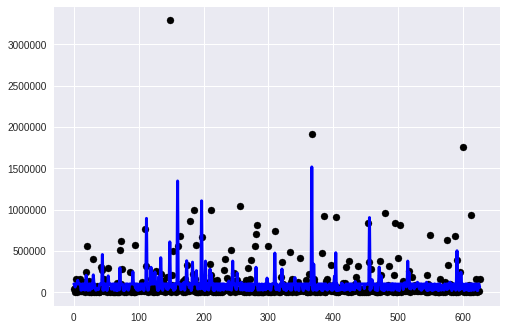

In [0]:
# Plot outputs
myList=[i for i in range(y_test.size)]
plt.scatter(myList,y_test,color='black')
plt.plot(myList,y_pred_clf,color = 'blue',linewidth=3)

*  we have some the predicted values very high compared to actual Y values.
*  This model has performed better than the linear model.

## **Calculating Parameters for GBM model**

Test data Mean Absolute Percent error: 603.9713040481307
Test data Mean Absolute error: 93713.68252043227
Train data Mean Absolute Percent error: 619.0717461710456
Train data Mean Absolute error: 74455.87709858762


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f6939c182e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6939c18b70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6939c1e630>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6939c1e2b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6939c18470>,
  <matplotlib.lines.Line2D at 0x7f6939bb19b0>]}

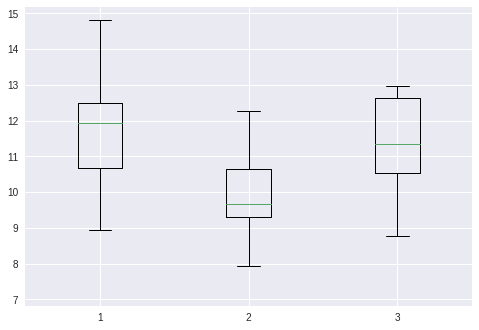

In [0]:
MAPE = np.mean(np.abs((y_test - y_pred_clf) / y_test)) * 100
print("Test data Mean Absolute Percent error: "+ str(MAPE))

MAE = np.mean(np.abs(y_test - y_pred_clf))
print("Test data Mean Absolute error: "+ str(MAE))

results_model.loc[2,'Test_MAPE']=MAPE
results_model.loc[2,'Test_MAE']=MAE

t_pred=clf.predict(x_train.iloc[:,0:13])
#error for training set 
MAPE = np.mean(np.abs((y_train - t_pred) / y_train)) * 100
print("Train data Mean Absolute Percent error: "+ str(MAPE))
results_model.loc[2,'Train_MAPE']=MAPE
MAE = np.mean(np.abs(y_train - t_pred))
print("Train data Mean Absolute error: "+ str(MAE))
results_model.loc[2,'Train_MAE']=MAE

AE = np.abs(y_test - y_pred_clf)
AE_log = np.log(AE)
#plt.boxplot(AE_log)

nf_df = x_test
nf_df['AE']=AE
CA=nf_df[nf_df['STNAME']=='California']['AE']
TX=nf_df[nf_df['STNAME']=='Texas']['AE']
FL=nf_df[nf_df['STNAME']=='Florida']['AE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

**Inferences from box plot**

*  even in gbm california has high MAE compared to other two.
*  texas and florida has almost same MAE.

## **Box plot**

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


{'boxes': [<matplotlib.lines.Line2D at 0x7f6939b8dfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6939b96898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6939ba0358>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6939b96f98>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6939b96198>,
  <matplotlib.lines.Line2D at 0x7f6939b326d8>]}

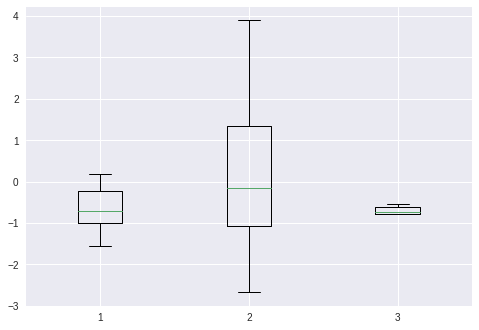

In [0]:
APE = np.abs((y_test - y_pred_clf)/y_test)
#plt.boxplot(APE)
APE_log = np.log(APE)
#plt.boxplot(APE_log)

nf_df = x_test
nf_df['APE']=APE
CA=nf_df[nf_df['STNAME']=='California']['APE']
TX=nf_df[nf_df['STNAME']=='Texas']['APE']
FL=nf_df[nf_df['STNAME']=='Florida']['APE']

data = [np.log(CA),np.log(TX),np.log(FL)]
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

 **Inferences from box plot**
 
 *  MAPE for the california,Texas is almost zero.
 *  For Florida MAPE is negative and has less variation.

## **50 worst predictions for GBM model**

In [0]:
# 50 worst predicted countries in the US from linear regression
AE_d= np.abs(y_pred_clf-y_test)
x_test_error = test.iloc[:,2:17]
x_test_error['pop_pred']=y_pred_clf
x_test_error['AE']=AE_d

#soritng based upon the absolute error
x_sort=x_test_error.sort_values(['AE'], ascending=[False])

# getting top 50 rows 
pred_50_forest=x_sort.head(50)
pred_50_forest

,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,STNAME,CTYNAME,POPESTIMATE2015,pop_pred,AE
614,0.0100,0.03,0.04,0.06,0.08,0.16,0.980,9.830000,20.010000,31.154000,47.090000,227.960007,California,San Diego,3290044,6.095202e+05,2.680524e+06
2413,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Michigan,Wayne,1762098,9.978809e+04,1.662310e+06
659,1.0685,1.16,1.20,2.67,9.49,20.16,36.090,56.754999,76.459999,110.870002,133.704006,179.309998,Virginia,Portsmouth city,96241,1.346288e+06,1.250047e+06
1036,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Maryland,Montgomery,1039370,9.978809e+04,9.395819e+05
770,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Missouri,St. Louis,1001127,9.978809e+04,9.013389e+05
1937,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Wisconsin,Milwaukee,958859,9.978809e+04,8.590709e+05
2450,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Illinois,DuPage,933115,9.978809e+04,8.333269e+05
1563,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,New York,Erie,924122,9.978809e+04,8.243339e+05
866,0.0600,0.10,0.13,0.17,0.30,1.02,4.370,14.048000,24.336000,35.906001,53.239599,154.190002,Hawaii,Honolulu,993716,2.204713e+05,7.732447e+05
745,0.0000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,Connecticut,New Haven,861594,9.978809e+04,7.618059e+05


# **comparing all models**

In [0]:
results_model

,Model,Test_MAE,Test_MAPE,Train_MAE,Train_MAPE
0,Linear,102801.754465,689.682796,106894.105862,647.288910
1,Random,95754.874541,545.890625,77800.204712,636.296062
2,GBM,93713.682520,603.971304,74455.877099,619.071746


# **Summary of normal models**


**About the Result**

1.   Random forest annd GBM model has been fitted well with the training set but in performace wise Random forest has got best results

2.   Random forest regression has got the best results out of all models






# **Applying K Fold**

In [0]:
#importing the KFold
from sklearn.model_selection import KFold

X=df.iloc[:,2:14]
y=df['POPESTIMATE2015']

#defining the split into 10 folds
kf=KFold(n_splits=10)


#returns the number of splitting iterations in the cross-validator
kf.get_n_splits(X)

print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=10, random_state=None, shuffle=False)

## **K fold on linear Regression**

In [0]:
# lets see the results
regr = linear_model.LinearRegression()

# for calcualting the accuracy score
from sklearn.metrics import accuracy_score

d={'Model':['Linear_k','Random_k','GBM_k'],'Test_MAPE':[652.42,572.21,609.77],'Test_MAE':[108995.995,106748.61,102956.35],'Train_MAPE':[652.42,572.21,609.77],'Train_MAE':[108995.995,106748.61,102956.35]}
results_k_model=pd.DataFrame(data=d)
results_k_model

#print('TRAIN:', train_index, 'TEST:', test_index)
MAPE_tr=0
MAE_tr=0
MAE_te=0
MAPE_te=0
for train_index, test_index in kf.split(X):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]
  regr.fit(X_train,y_train)
  b=regr.predict(X_test)
  c=regr.predict(X_train)
  MAPE_tr += np.mean(np.abs((y_test - b) / y_test)) * 100
  MAE_tr += np.mean(np.abs(y_test - b))
  MAPE_te += np.mean(np.abs((y_train - c) / y_train)) * 100
  MAE_te += np.mean(np.abs(y_train - c))
  
  
results_k_model.loc[0,'Train_MAE']=MAE_tr/10
results_k_model.loc[0,'Train_MAPE']=MAPE_tr/10
results_k_model.loc[0,'Test_MAE']=MAE_te/10
results_k_model.loc[0,'Test_MAPE']=MAPE_te/10

## ***K fold on Random forest***

In [0]:
# random forest model
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

MAPE_tr=0
MAE_tr=0
MAE_te=0
MAPE_te=0
for train_index, test_index in kf.split(X):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]
  regressor.fit(X_train,y_train)
  b=regressor.predict(X_test)
  c=regressor.predict(X_train)
  MAPE_tr += np.mean(np.abs((y_test - b) / y_test)) * 100
  MAE_tr += np.mean(np.abs(y_test - b))
  MAPE_te += np.mean(np.abs((y_train - c) / y_train)) * 100
  MAE_te += np.mean(np.abs(y_train - c))
  
  
results_k_model.loc[1,'Train_MAE']=MAE_tr/10
results_k_model.loc[1,'Train_MAPE']=MAPE_tr/10
results_k_model.loc[1,'Test_MAE']=MAE_te/10
results_k_model.loc[1,'Test_MAPE']=MAPE_te/10

## **K fold on GBM **

In [0]:
# random forest model
clf = ensemble.GradientBoostingRegressor(**params)

MAPE_tr=0
MAE_tr=0
MAE_te=0
MAPE_te=0
for train_index, test_index in kf.split(X):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]
  clf.fit(X_train,y_train)
  b=clf.predict(X_test)
  c=clf.predict(X_train)
  MAPE_tr += np.mean(np.abs((y_test - b) / y_test)) * 100
  MAE_tr += np.mean(np.abs(y_test - b))
  MAPE_te += np.mean(np.abs((y_train - c) / y_train)) * 100
  MAE_te += np.mean(np.abs(y_train - c))
  
  
results_k_model.loc[2,'Train_MAE']=MAE_tr/10
results_k_model.loc[2,'Train_MAPE']=MAPE_tr/10
results_k_model.loc[2,'Test_MAE']=MAE_te/10
results_k_model.loc[2,'Test_MAPE']=MAPE_te/10

#**K fold model results**

In [0]:
results_k_model

,Model,Test_MAE,Test_MAPE,Train_MAE,Train_MAPE
0,Linear_k,106340.151539,704.225955,110878.691481,685.889186
1,Random_k,77792.714611,811.988225,106178.722847,1769.578123
2,GBM_k,77004.106872,620.093435,105859.909411,2577.356904


# **using cross_val_score**

In [0]:
from sklearn.model_selection import cross_val_score

#from sklearn.cross_validation import cross_val_score

csf = linear_model.Lasso()
scores = cross_val_score(csf,X,y,cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [0]:
scores

array([-0.82409669, -0.26509031, -0.04175387,  0.09854559,  0.21720575,
        0.10336203,  0.09406891, -0.02377484, -0.05283625,  0.39338109])

# **Final Summary**

**General Insights from data**

*  general view of states and citys with summation from Q0 : Q100,check below link for Tableau insights
https://drive.google.com/file/d/1YkMrniL5Qwkd717QRP0sDHiMVGhpOKWE/view?usp=sharing

*  More than half of the row values from Q0 till Q100 are zero.
*  we observe all the citys or states which has zeros are from north part of the USA,check results from below link for Tableau insights
https://drive.google.com/file/d/1iHZJ11hYHn-79Jry2JPvZ3murPGpxiZ3/view?usp=sharing


**changes to data**

*  All the negative values of Q0 till Q100 are replaced with zero.
*  I have considered 75 % data for training and rest for testing.


In [0]:
results_model

,Model,Test_MAE,Test_MAPE,Train_MAE,Train_MAPE
0,Linear,102801.754465,689.682796,106894.105862,647.288910
1,Random,95754.874541,545.890625,77800.204712,636.296062
2,GBM,93713.682520,603.971304,74455.877099,619.071746


**Results from general split (75:25):**

**Interms of Training**

*   Random forest and GBM have almost same MAE,MAPE which means both models have similalr training accuracy. 
*   Linear regression model didn't even have proper training because it has very high MAE,MAPE.
*  But interms of MAPE linear regression model seems to perfromed well.

**Interms of Testing**

*  Again Random Forest and GBM models have less MAE and MAPE compared to Linear regression model.
*  Linear regression model very high MAPE and MAE which means that this model is not performing well on test dataset.


*  Overall, GBM model is slightly better than the Random forest model.



**Insights from box plots for AE**

*  from the box plots of California , Texas and Florida , we can say that california has high MAE compared to remaining two states in all the models.

*  For all the Models, Texas and Florida has similar MAE.

*  California has high variation in AE compared to other models.

**Insights from box plots for APE**

*  For all the models , california has MAPE near to zero.
*  There is a lot of variation in MAPE for Texas state compared to remaining two states.


In [0]:
results_k_model

,Model,Test_MAE,Test_MAPE,Train_MAE,Train_MAPE
0,Linear_k,106340.151539,704.225955,110878.691481,685.889186
1,Random_k,77792.714611,811.988225,106178.722847,1769.578123
2,GBM_k,77004.106872,620.093435,105859.909411,2577.356904


**K Fold Results(K=10)**


**Insights from Training**

*   Random forest and GBM have same MAE but Random forest have less MAPE than GBM model
*  surprisingly Linear model has very MAPE than other two models but this has high MAE.


**Insights from Testing**

*  Here GBM has least MAPE compared to other two.
*  Again random and gbm have similar MAE


Overall, GBM model has performed well than other model .Even this model has less training accuracy but it had performed well on test data set.

















**Overall summary on Models**

*  K fold on GBM has performed well comapred to all other six models with less MAPE and MAE.